In [45]:
import pandas as pd
import numpy as np
import mglearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [46]:
class knn_reg:
    def __init__(self, neighbor_number, weight_val='distance'):
        self.__model = KNeighborsRegressor(n_neighbors= neighbor_number, weights=weight_val)
        self.__n_neighbor = neighbor_number
        self.__weight = weight_val

    def train(self, x_train, y_train):
        self.__model.fit(x_train, y_train)

    def predict(self, x_data):
        return self.__model.predict(x_data)

    def score(self, x_data, y_data):
        return self.__model.score(x_data, y_data)

    def cross_valid(self, x_train, y_train):
        split_len = int(len(x_train)/5)

        x_split = []
        y_split = []

        for i in range(4):
            x_split.append(x_train[i*split_len:(i+1)*split_len, :])
            y_split.append(y_train[i*split_len:(i+1)*split_len])

        x_split.append(x_train[4*split_len:, :])
        y_split.append(y_train[4*split_len:])

        valid_score = float(0)
        train_score = float(0)

        for i in range(5):
            is_array_exsist = False

            for j in range(5):
                if(not is_array_exsist):
                    is_array_exsist = True
                    x_valid_train = np.array(x_split[j])
                    y_valid_train = np.array(y_split[j])
                    continue

                if(j == i):
                    pass
                else:
                    x_valid_train = np.vstack((x_valid_train, x_split[j]))
                    y_valid_train = np.hstack((y_valid_train, y_split[j]))

            self.train(x_valid_train, y_valid_train)
            valid_score = valid_score  + self.__model.score(x_split[i], y_split[i])
            train_score = train_score + self.__model.score(x_valid_train, y_valid_train)

            print(f'KNN Regressor (n_neighbor:{self.__n_neighbor}) fold {i}, train/test score: ', end='')
            print(f'{self.__model.score(x_valid_train, y_valid_train):.2f}/{self.__model.score(x_split[i], y_split[i]):.2f}')

        self.__model.fit(x_train, y_train)
        self.__cross_valid_train_score = float(train_score/5)
        self.__cross_valid_valid_score = float(valid_score/5)

        print(f'KNN Regressor (n_neighbor:{self.__n_neighbor}) 5-fold cross validation train/test: {self.__cross_valid_train_score:.2f}/{self.__cross_valid_valid_score:.2f}')

        # return [self.__cross_valid_train_score, self.__cross_valid_valid_score]

    def plot(self, ax, x_train, y_train, x_test, y_test):
        
        ax.plot(x_test, self.predict(x_test))
        ax.plot(x_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
        ax.plot(x_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
        ax.set_title(f'n_neighbor:{self.__n_neighbor}/weight:{self.__weight}\ntrain_score:{self.score(x_train, y_train)}/test_score:{self.score(x_test, y_test)}')
        ax.set_xlabel('Feature')
        ax.set_ylabel('Target')

In [47]:
class ridge_reg:
    def __init__(self, reg_alpha):
        self.__model = Ridge(alpha=reg_alpha, fit_intercept=True)
        self.__alpha = reg_alpha

    def train(self, x_data, y_data):
        self.__model.fit(x_data, y_data)

    def predict(self, x_data):
        return self.__model.predict(x_data)

    def score(self, x_data, y_data):
        return self.__model.score(x_data, y_data)

    def cross_valid(self, x_train, y_train):
        split_len = int(len(x_train)/5)

        x_split = []
        y_split = []

        for i in range(4):
            x_split.append(x_train[i*split_len:(i+1)*split_len, :])
            y_split.append(y_train[i*split_len:(i+1)*split_len])

        x_split.append(x_train[4*split_len:, :])
        y_split.append(y_train[4*split_len:])

        valid_score = float(0)
        train_score = float(0)

        for i in range(5):
            is_array_exsist = False

            for j in range(5):
                if(not is_array_exsist):
                    is_array_exsist = True
                    x_valid_train = np.array(x_split[j])
                    y_valid_train = np.array(y_split[j])
                    continue

                if(j == i):
                    pass
                else:
                    x_valid_train = np.vstack((x_valid_train, x_split[j]))
                    y_valid_train = np.hstack((y_valid_train, y_split[j]))

            self.train(x_valid_train, y_valid_train)
            valid_score = valid_score  + self.__model.score(x_split[i], y_split[i])
            train_score = train_score + self.__model.score(x_valid_train, y_valid_train)

            print(f'Ridge (alpha:{self.__alpha}) fold {i}, train/test score: ', end='')
            print(f'{self.__model.score(x_valid_train, y_valid_train):.2f}/{self.__model.score(x_split[i], y_split[i]):.2f}')

        self.__model.fit(x_train, y_train)
        self.__cross_valid_train_score = float(train_score/5)
        self.__cross_valid_valid_score = float(valid_score/5)

        print(f'Ridge (alpha:{self.__alpha}) 5-fold cross validation train/test: {self.__cross_valid_train_score:.2f}/{self.__cross_valid_valid_score:.2f}')

        # return [self.__cross_valid_train_score, self.__cross_valid_valid_score]
    
    def plot(self, ax,x_train, y_train, x_test, y_test):

        feature_number = range(len(x_train[0]))
        ax.plot(feature_number, self.__model.coef_, 'bo', markersize=8)
        ax.set_title(f'Ridge(alpha:{self.__alpha})\n train_score:{self.score(x_train, y_train):.2f} test_score:{self.score(x_test, y_test):.2f}')
        ax.set_xlabel('Coeficient Index')
        ax.set_ylabel('Coeficient Magnitude')


In [48]:
class randonforest_reg:
    def __init__(self, estimator_val,max_depth_val, max_feature_val):
        self.__model = RandomForestRegressor(n_estimators=estimator_val, max_depth=max_depth_val, max_features=max_feature_val, random_state=42)
        self.__n_estimators = estimator_val
        self.__max_depth = max_depth_val
        self.__max_features = max_feature_val

    def train(self, x_data, y_data):
        self.__model.fit(x_data, y_data)

    def score(self, x_data, y_data):
        return self.__model.score(x_data, y_data)

    def predict(self, x_data):
        return self.__model.predict(x_data)

    def plot(self, ax, x_train, y_train, x_test, y_test):
        features = list(range(len(x_train[0])))
        ax.barh(features, self.__model.feature_importances_, color='blue')
        ax.set_title(f'random forest feature importances\nmax_depth:{self.__max_depth} max_feature:{self.__max_features} train_score:{self.score(x_train, y_train):.2f} test_score:{self.score(x_test, y_test):.2f}', fontsize=20)
        ax.set_xlabel('feature importance', fontsize=20)
        ax.set_ylabel('feature index', fontsize=20)

    def cross_valid(self, x_train, y_train):
        split_len = int(len(x_train)/5)

        x_split = []
        y_split = []

        for i in range(4):
            x_split.append(x_train[i*split_len:(i+1)*split_len, :])
            y_split.append(y_train[i*split_len:(i+1)*split_len])

        x_split.append(x_train[4*split_len:, :])
        y_split.append(y_train[4*split_len:])

        valid_score = float(0)
        train_score = float(0)

        for i in range(5):
            is_array_exsist = False

            for j in range(5):
                if(not is_array_exsist):
                    is_array_exsist = True
                    x_valid_train = np.array(x_split[j])
                    y_valid_train = np.array(y_split[j])
                    continue

                if(j == i):
                    pass
                else:
                    x_valid_train = np.vstack((x_valid_train, x_split[j]))
                    y_valid_train = np.hstack((y_valid_train, y_split[j]))

            self.train(x_valid_train, y_valid_train)
            valid_score = valid_score  + self.__model.score(x_split[i], y_split[i])
            train_score = train_score + self.__model.score(x_valid_train, y_valid_train)

            print(f'Random Forest fold {i}, train/test score: ', end='')
            print(f'{self.__model.score(x_valid_train, y_valid_train):.2f}/{self.__model.score(x_split[i], y_split[i]):.2f}')

        self.__model.fit(x_train, y_train)
        self.__cross_valid_train_score = float(train_score/5)
        self.__cross_valid_valid_score = float(valid_score/5)

        print(f'Random Forests 5-fold cross validation train/test: {self.__cross_valid_train_score:.2f}/{self.__cross_valid_valid_score:.2f}')

        # return [self.__cross_valid_train_score, self.__cross_valid_valid_score]
    
    def find_important_feature(self):
        coef = np.array(self.__model.feature_importances_)
        return np.argsort(coef)[-5:]

In [49]:
class svr_reg:
    def __init__(self,c_val, gamma_val = 'scale'):
        self.__model = SVR(C=c_val, gamma=gamma_val)
        self.__C = c_val

    def train(self, x_data, y_data):
        self.__model.fit(x_data, y_data)
        self.gamma = self.__model._gamma

    def predict(self, x_data):
        return self.__model.predict(x_data)

    def score(self, x_data, y_data):
        return self.__model.score(x_data, y_data)

    def cross_valid(self, x_train, y_train):
        split_len = int(len(x_train)/5)

        x_split = []
        y_split = []

        for i in range(4):
            x_split.append(x_train[i*split_len:(i+1)*split_len, :])
            y_split.append(y_train[i*split_len:(i+1)*split_len])

        x_split.append(x_train[4*split_len:, :])
        y_split.append(y_train[4*split_len:])

        valid_score = float(0)
        train_score = float(0)

        for i in range(5):
            is_array_exsist = False

            for j in range(5):
                if(not is_array_exsist):
                    is_array_exsist = True
                    x_valid_train = np.array(x_split[j])
                    y_valid_train = np.array(y_split[j])
                    continue

                if(j == i):
                    pass
                else:
                    x_valid_train = np.vstack((x_valid_train, x_split[j]))
                    y_valid_train = np.hstack((y_valid_train, y_split[j]))

            self.train(x_valid_train, y_valid_train)
            valid_score = valid_score  + self.__model.score(x_split[i], y_split[i])
            train_score = train_score + self.__model.score(x_valid_train, y_valid_train)

            print(f'SVR (C:{self.__C}) fold {i}, train/test score: ', end='')
            print(f'{self.__model.score(x_valid_train, y_valid_train):.2f}/{self.__model.score(x_split[i], y_split[i]):.2f}')

        self.__model.fit(x_train, y_train)
        self.__cross_valid_train_score = float(train_score/5)
        self.__cross_valid_valid_score = float(valid_score/5)

        print(f'SVR (C:{self.__C} gamma:{self.__model.gamma}) 5-fold cross validation train/test: {self.__cross_valid_train_score:.2f}/{self.__cross_valid_valid_score:.2f}')

        # return [self.__cross_valid_train_score, self.__cross_valid_valid_score]

In [50]:
class mlp_reg:
    def __init__(self):
        self.__model = MLPRegressor(hidden_layer_sizes=(512, 128, 16, 1), activation='logistic', solver='adam', learning_rate_init=0.005, early_stopping=False, max_iter=10000, 
        verbose=False, n_iter_no_change=100, random_state=1, alpha=0.01)

    def train(self, x_data, y_data):
        self.__model.fit(x_data, y_data)

    def predict(self, x_data):
        return self.__model.predict(x_data)

    def score(self, x_data, y_data):
        return self.__model.score(x_data, y_data)

    def cross_valid(self, x_train, y_train):
        split_len = int(len(x_train)/5)

        x_split = []
        y_split = []
        self.cross_valid_valid_score_list = []
        self.cross_valid_train_score_list = []

        for i in range(4):
            x_split.append(x_train[i*split_len:(i+1)*split_len, :])
            y_split.append(y_train[i*split_len:(i+1)*split_len])

        x_split.append(x_train[4*split_len:, :])
        y_split.append(y_train[4*split_len:])

        valid_score = float(0)
        train_score = float(0)

        for i in range(5):
            is_array_exsist = False

            for j in range(5):
                if(not is_array_exsist):
                    is_array_exsist = True
                    x_valid_train = np.array(x_split[j])
                    y_valid_train = np.array(y_split[j])
                    continue

                if(j == i):
                    pass
                else:
                    x_valid_train = np.vstack((x_valid_train, x_split[j]))
                    y_valid_train = np.hstack((y_valid_train, y_split[j]))

            self.train(x_valid_train, y_valid_train)
            valid_score = valid_score  + self.__model.score(x_split[i], y_split[i])
            train_score = train_score + self.__model.score(x_valid_train, y_valid_train)

            self.cross_valid_valid_score_list.append(self.__model.score(x_split[i], y_split[i]))
            self.cross_valid_train_score_list.append(self.__model.score(x_valid_train, y_valid_train))

            print(f'MLP Regressor fold {i}, train/test score: ', end='')
            print(f'{self.__model.score(x_valid_train, y_valid_train):.2f}/{self.__model.score(x_split[i], y_split[i]):.2f}')

        self.__model.fit(x_train, y_train)
        self.cross_valid_train_score = float(train_score/5)
        self.cross_valid_valid_score = float(valid_score/5)

        print(f'MLP Regressor 5-fold cross validation train/test: {self.cross_valid_train_score:.2f}/{self.cross_valid_valid_score:.2f}')


In [51]:
data_frame = pd.read_csv('./cost-of-living_v2.csv')

data_frame = data_frame.drop(['city', 'country', 'data_quality'], axis=1)
data_frame = data_frame.dropna()
data_frame = data_frame.reset_index(drop=True)

data_frame.info()

scaler = StandardScaler()
raw_data = scaler.fit_transform(data_frame)

# raw_data = data_frame.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1278 non-null   float64
 1   x2      1278 non-null   float64
 2   x3      1278 non-null   float64
 3   x4      1278 non-null   float64
 4   x5      1278 non-null   float64
 5   x6      1278 non-null   float64
 6   x7      1278 non-null   float64
 7   x8      1278 non-null   float64
 8   x9      1278 non-null   float64
 9   x10     1278 non-null   float64
 10  x11     1278 non-null   float64
 11  x12     1278 non-null   float64
 12  x13     1278 non-null   float64
 13  x14     1278 non-null   float64
 14  x15     1278 non-null   float64
 15  x16     1278 non-null   float64
 16  x17     1278 non-null   float64
 17  x18     1278 non-null   float64
 18  x19     1278 non-null   float64
 19  x20     1278 non-null   float64
 20  x21     1278 non-null   float64
 21  x22     1278 non-null   float64
 22  

In [52]:
raw_x = raw_data[:,0:47]
raw_x = np.hstack((raw_x, raw_data[:,53].reshape(-1,1)))
raw_y = raw_data[:,47]
x_train, x_test, y_train, y_test = train_test_split(raw_x, raw_y, test_size=0.2, random_state=50)

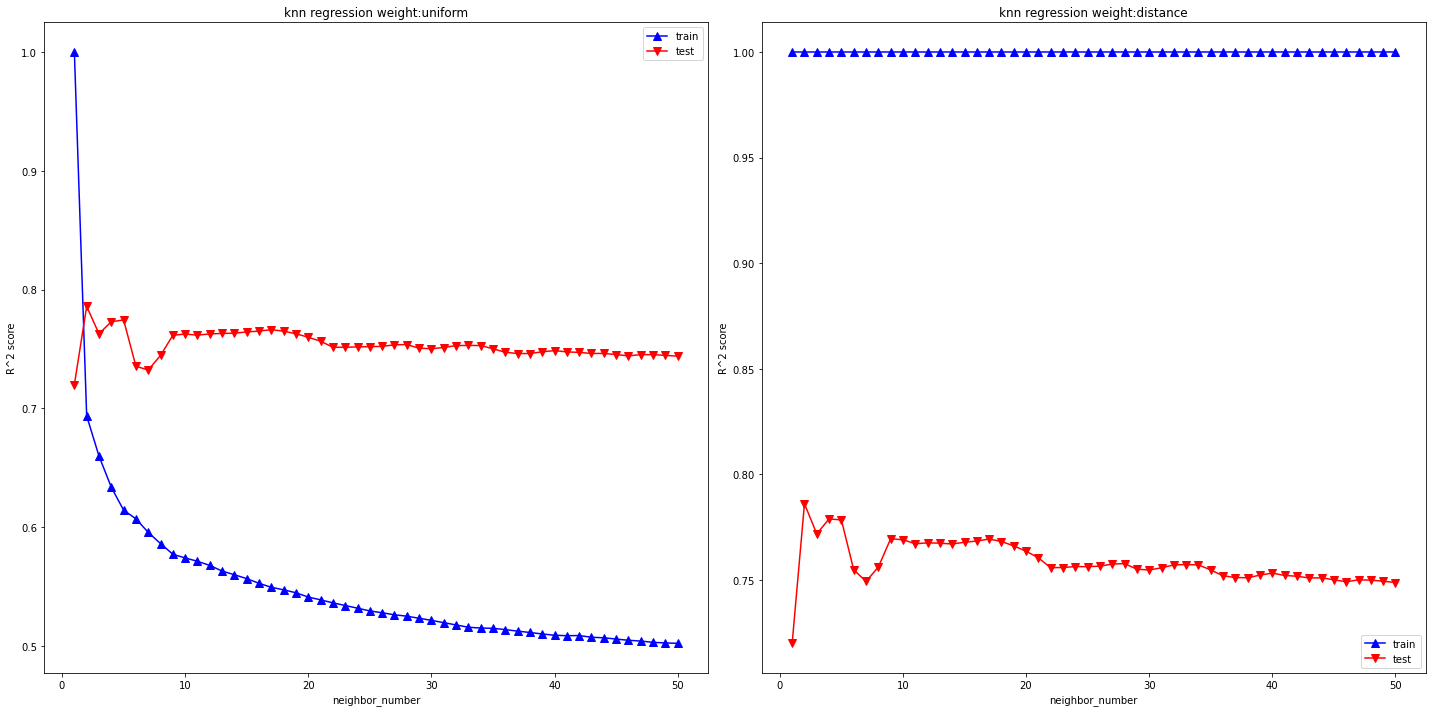

KNN Regressor (n_neighbor:2) fold 0, train/test score: 0.69/0.85
KNN Regressor (n_neighbor:2) fold 1, train/test score: 0.68/0.57
KNN Regressor (n_neighbor:2) fold 2, train/test score: 0.65/0.79
KNN Regressor (n_neighbor:2) fold 3, train/test score: 0.88/0.24
KNN Regressor (n_neighbor:2) fold 4, train/test score: 0.66/-0.27
KNN Regressor (n_neighbor:2) 5-fold cross validation train/test: 0.71/0.43
KNN Regressor (n_neighbor:2) train/test score: 0.69/0.79


In [53]:
knn_list = []
knn_score_uniform = []
knn_score_distance = []
neighbor_number = list(range(1,51))

for i in neighbor_number:
    knn_uniform = knn_reg(i,'uniform')
    knn_distance = knn_reg(i, 'distance')

    knn_uniform.train(x_train, y_train)
    knn_score_uniform.append([knn_uniform.score(x_train, y_train), knn_uniform.score(x_test, y_test)])
    knn_list.append(knn_uniform)

    knn_distance.train(x_train, y_train)
    knn_score_distance.append([knn_distance.score(x_train, y_train), knn_distance.score(x_test,y_test)])

knn_score_uniform = np.array(knn_score_uniform)
knn_score_distance = np.array(knn_score_distance)

fig, ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(neighbor_number, knn_score_uniform[:,0],'b^-', markersize=8, label='train')
ax[0].plot(neighbor_number, knn_score_uniform[:,1],'vr-', markersize=8, label='test')
ax[0].set_title('knn regression weight:uniform')
ax[0].set_xlabel('neighbor_number')
ax[0].set_ylabel('R^2 score')
ax[0].legend(loc='best')

ax[1].plot(neighbor_number, knn_score_distance[:,0],'b^-', markersize=8, label='train')
ax[1].plot(neighbor_number, knn_score_distance[:,1],'vr-', markersize=8, label='test')
ax[1].set_title('knn regression weight:distance')
ax[1].set_xlabel('neighbor_number')
ax[1].set_ylabel('R^2 score')
ax[1].legend(loc='best')

fig.set_facecolor(color='white')
plt.tight_layout()
plt.show()

knn_list[1].cross_valid(x_train, y_train)
print(f'KNN Regressor (n_neighbor:2) train/test score: {knn_list[1].score(x_train, y_train):.2f}/{knn_list[1].score(x_test, y_test):.2f}')

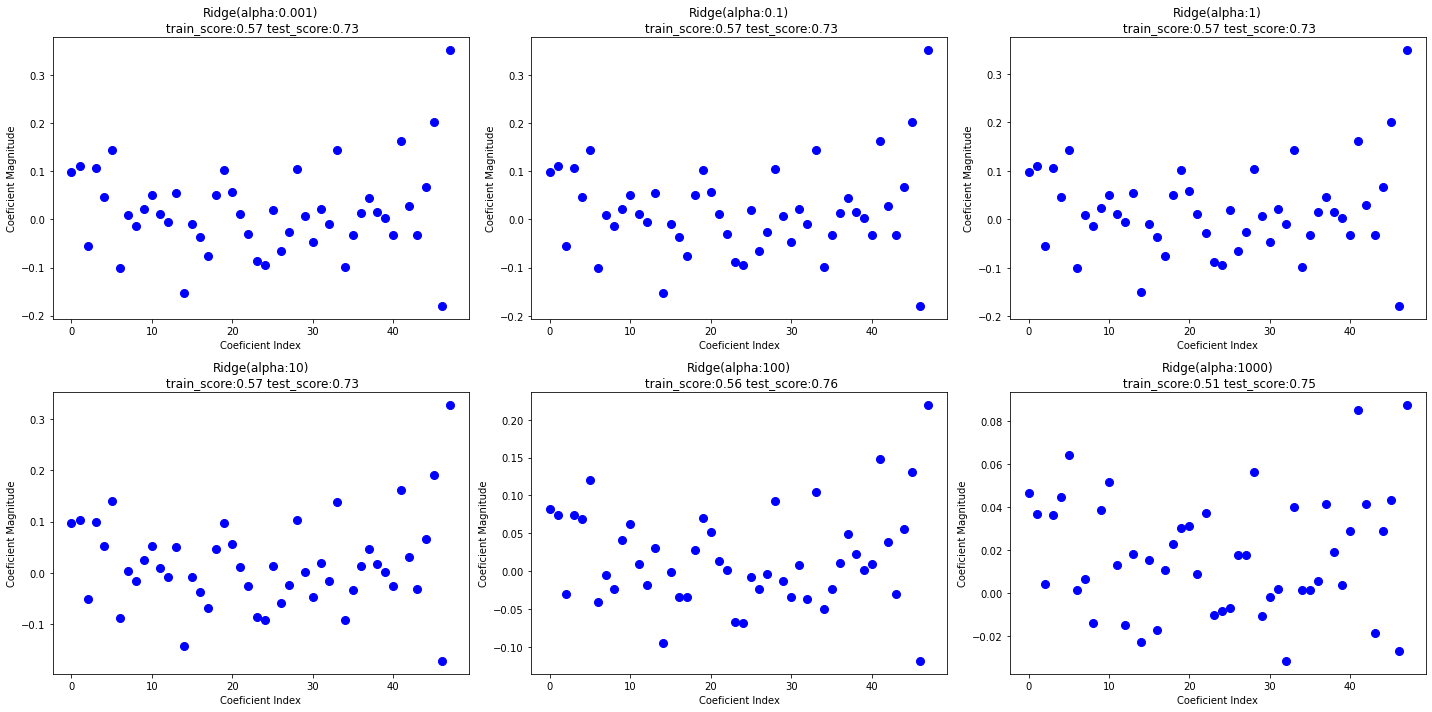

Ridge (alpha:100) fold 0, train/test score: 0.56/0.51
Ridge (alpha:100) fold 1, train/test score: 0.53/0.73
Ridge (alpha:100) fold 2, train/test score: 0.53/0.74
Ridge (alpha:100) fold 3, train/test score: 0.75/0.21
Ridge (alpha:100) fold 4, train/test score: 0.52/0.79
Ridge (alpha:100) 5-fold cross validation train/test: 0.58/0.60
Ridge (alpha:100) train/test score: 0.56/0.76


In [59]:
ridge_list = []
alpha_list = [0.001, 0.1, 1, 10, 100, 1000]

for alpha in alpha_list:
    ridge_temp = ridge_reg(reg_alpha=alpha)
    ridge_temp.train(x_train, y_train)
    ridge_list.append(ridge_temp)

fig, ax = plt.subplots(2,3, figsize=(20,10))

for i in range(3):
    ridge_list[i].plot(ax[0,i], x_train, y_train, x_test, y_test)
    ridge_list[i+3].plot(ax[1,i], x_train, y_train, x_test, y_test)

fig.set_facecolor(color='white')
plt.tight_layout()
plt.show()

ridge_list[4].cross_valid(x_train, y_train)
print(f'Ridge (alpha:100) train/test score: {ridge_list[4].score(x_train, y_train):.2f}/{ridge_list[4].score(x_test, y_test):.2f}')

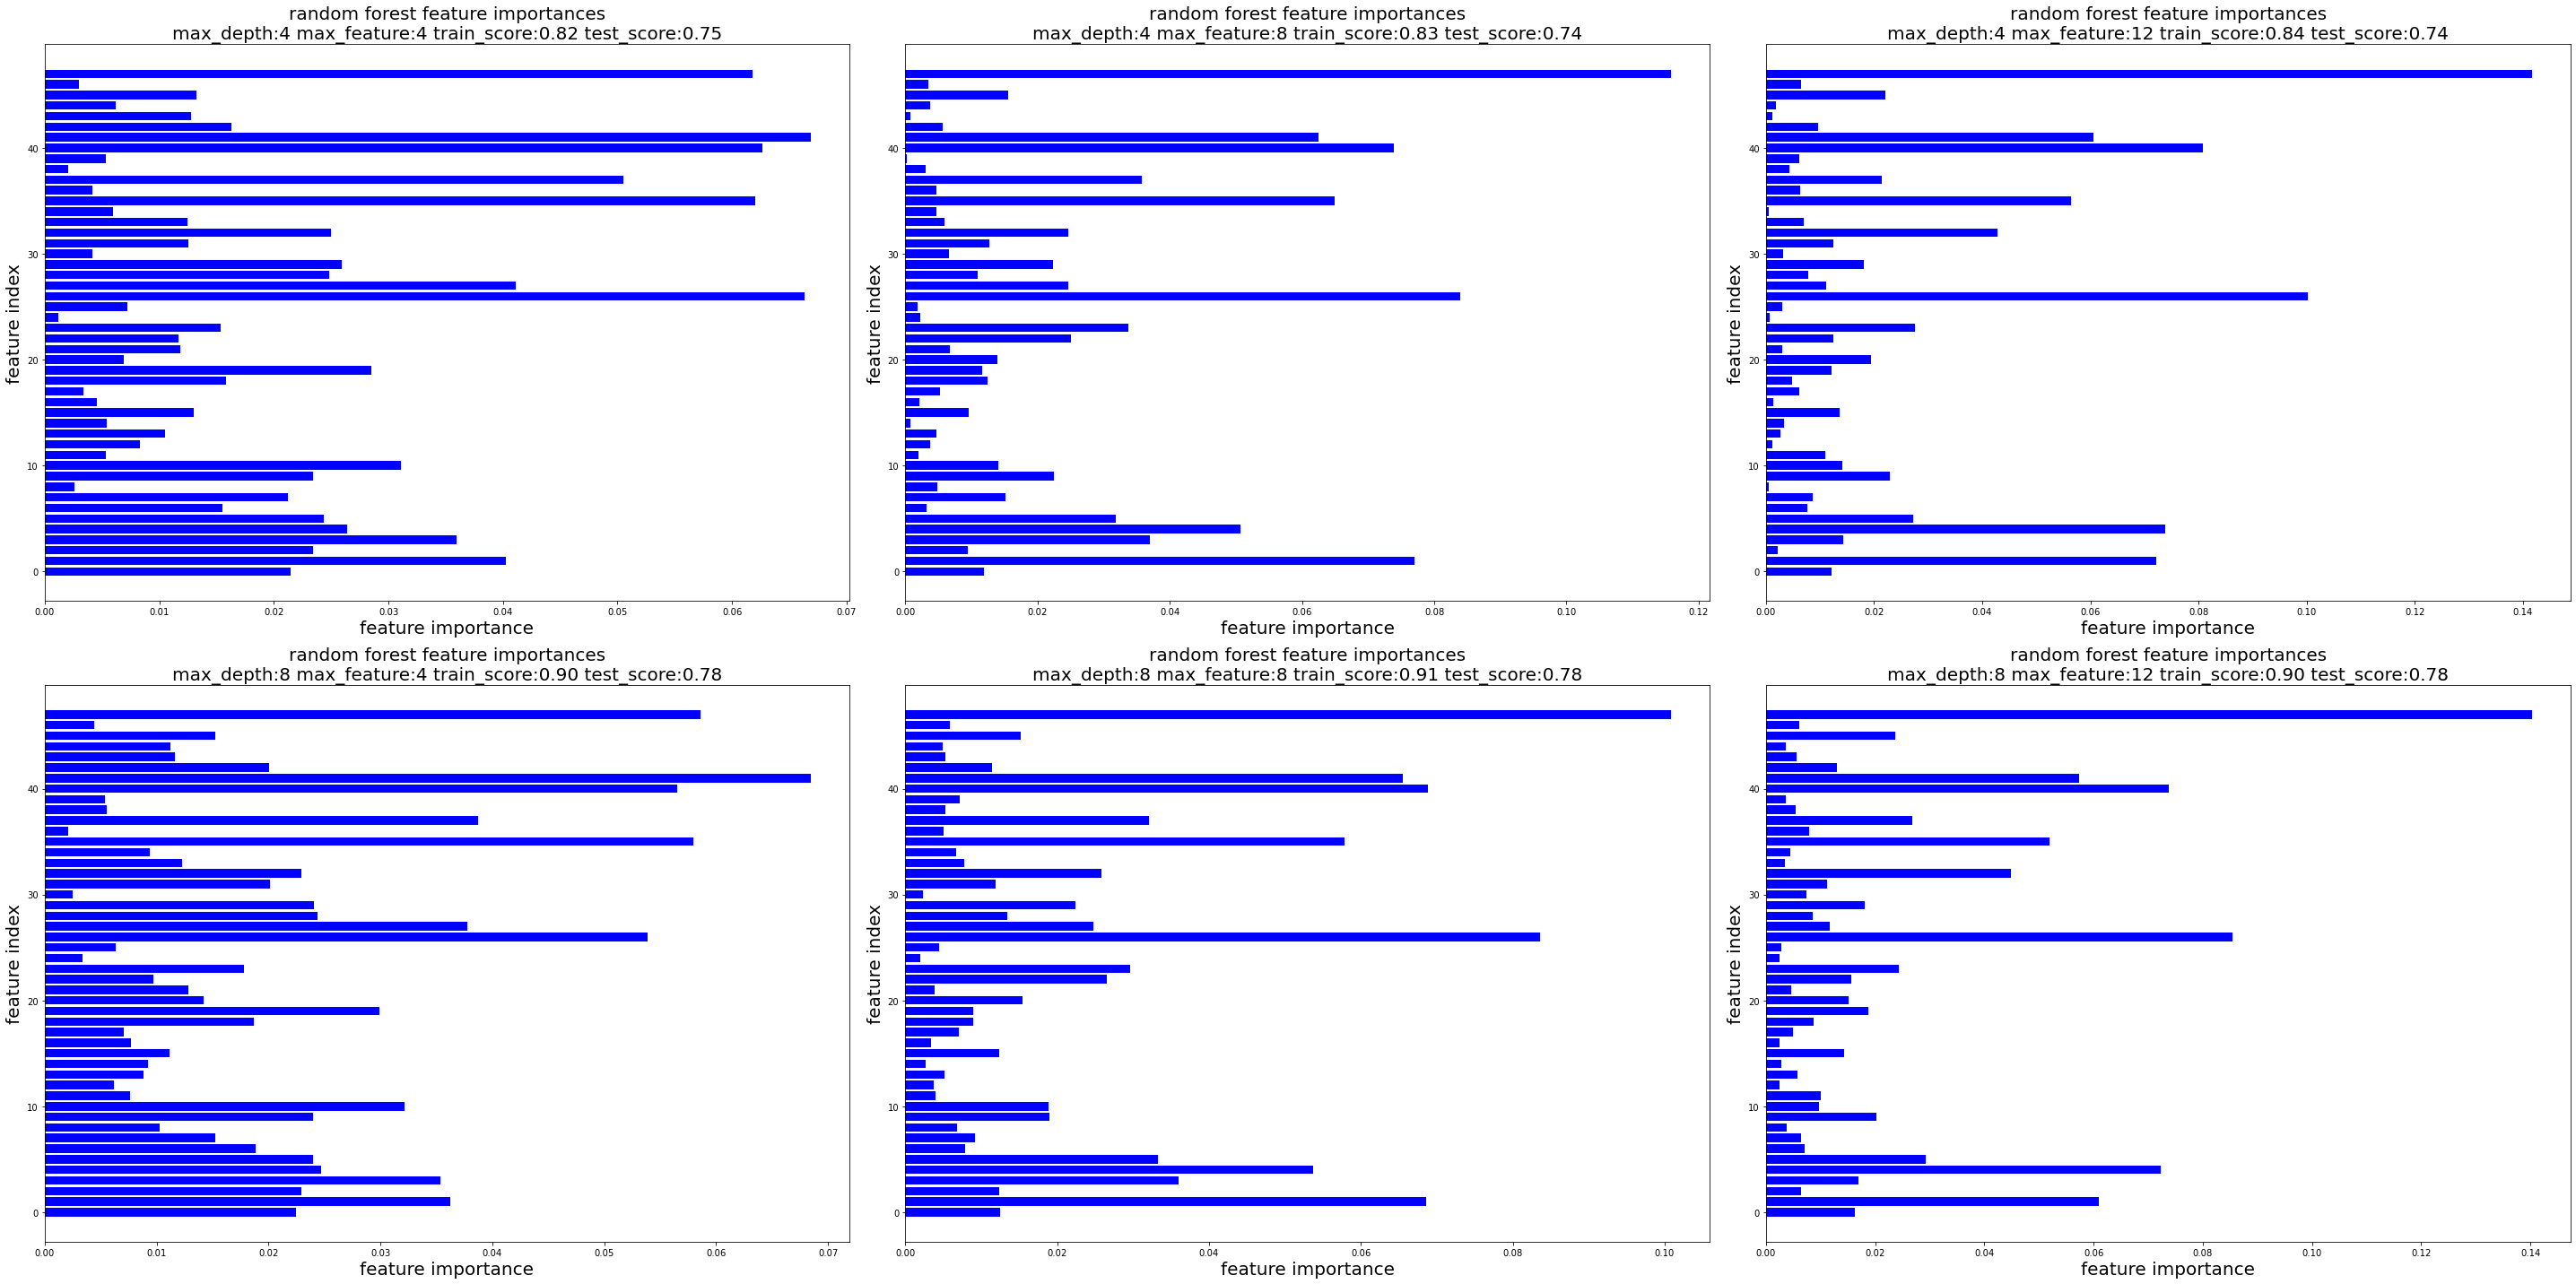

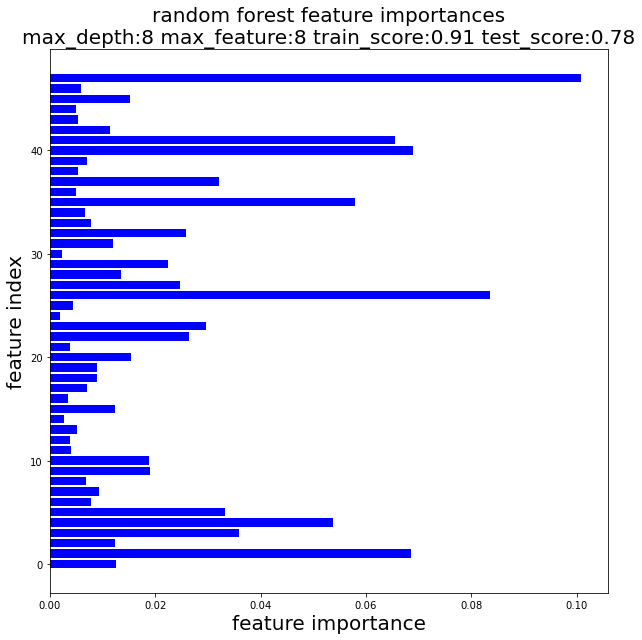

Random Forest fold 0, train/test score: 0.91/0.93
Random Forest fold 1, train/test score: 0.92/0.66
Random Forest fold 2, train/test score: 0.92/0.52
Random Forest fold 3, train/test score: 0.95/0.22
Random Forest fold 4, train/test score: 0.90/0.72
Random Forests 5-fold cross validation train/test: 0.92/0.61
 
Random Forest train/test score: 0.91/0.78
top 5 feature :[41  1 40 26 47]


In [55]:
randomforest_list = []
max_depth_list = [4, 8]
max_feature_list = [4, 8, 12]

for depth in max_depth_list:
    for feature in max_feature_list:
        randomforest = randonforest_reg(estimator_val=100, max_depth_val=depth, max_feature_val=feature)
        randomforest.train(x_train, y_train)
        randomforest_list.append(randomforest)

fig, ax = plt.subplots(2,3,figsize=(40,20))
for i in range(3):
    randomforest_list[i].plot(ax[0][i], x_train, y_train, x_test, y_test)
    randomforest_list[i+3].plot(ax[1][i], x_train, y_train, x_test, y_test)

fig.set_facecolor(color='white')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10,10))
randomforest_list[4].plot(ax, x_train, y_train, x_test, y_test)
plt.show()

randomforest_list[4].cross_valid(x_train, y_train)
print(' ')
print(f'Random Forest train/test score: {randomforest_list[4].score(x_train, y_train):.2f}/{randomforest_list[4].score(x_test, y_test):.2f}')
print(f'top 5 feature :{randomforest_list[4].find_important_feature()}')

In [56]:
svr_list = []
c_list = [0.1, 1, 10, 20, 25, 30, 100]
gamma_list = [0.1, 'scale']

for gamma in gamma_list:
    for c in c_list:
        svr = svr_reg(c_val=c, gamma_val=gamma)
        svr.train(x_train, y_train)
        svr_list.append(svr)
        print(f'SVR (c:{c} gamma:{gamma}) train/test score: {svr.score(x_train, y_train):.2f}/{svr.score(x_test, y_test):.2f}')

    print(' ')


print(' ')
svr_list[11].cross_valid(x_train, y_train)

SVR (c:0.1 gamma:0.1) train/test score: 0.36/0.45
SVR (c:1 gamma:0.1) train/test score: 0.66/0.63
SVR (c:10 gamma:0.1) train/test score: 0.94/0.64
SVR (c:20 gamma:0.1) train/test score: 0.99/0.64
SVR (c:25 gamma:0.1) train/test score: 0.99/0.64
SVR (c:30 gamma:0.1) train/test score: 0.99/0.64
SVR (c:100 gamma:0.1) train/test score: 0.99/0.64
 
SVR (c:0.1 gamma:scale) train/test score: 0.50/0.71
SVR (c:1 gamma:scale) train/test score: 0.60/0.78
SVR (c:10 gamma:scale) train/test score: 0.80/0.77
SVR (c:20 gamma:scale) train/test score: 0.92/0.76
SVR (c:25 gamma:scale) train/test score: 0.95/0.75
SVR (c:30 gamma:scale) train/test score: 0.98/0.74
SVR (c:100 gamma:scale) train/test score: 0.99/0.73
 
 
SVR (C:25) fold 0, train/test score: 0.95/0.87
SVR (C:25) fold 1, train/test score: 0.98/0.50
SVR (C:25) fold 2, train/test score: 0.95/0.80
SVR (C:25) fold 3, train/test score: 0.96/0.20
SVR (C:25) fold 4, train/test score: 0.97/0.46
SVR (C:25 gamma:scale) 5-fold cross validation train/test

In [57]:
mlp = mlp_reg()
# mlp.train(x_train, y_train)
mlp.cross_valid(x_train, y_train)
print(f'mlp regressor train/test score: {mlp.score(x_train, y_train):.2f}/{mlp.score(x_test, y_test):.2f}')

c:\Users\linau\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP Regressor fold 0, train/test score: 0.38/0.43


c:\Users\linau\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP Regressor fold 1, train/test score: 0.59/0.72
MLP Regressor fold 2, train/test score: 0.63/0.76
MLP Regressor fold 3, train/test score: 0.86/0.22
MLP Regressor fold 4, train/test score: 0.58/0.74
MLP Regressor 5-fold cross validation train/test: 0.61/0.57
mlp regressor train/test score: 0.97/0.79
